# GDP understanding using Lineal Regression
## Part 1: Data Quality and Analysis

Gross Domestic Product (GDP) or Producto Interno Bruto (PIB) in spanish is one of the most important metric for a country. Having a good GDP could bring benefits to the country, such as loans from world bank, increase external investments and better infrastructure. But how does it behave? What indicators affects the PBI? How can a country improve its metric? In this analysis we are trying to solve this questions, analyzing one Dataset taken from Gapminder with data from several countries, trying to find relations between different indicator and the GDP of the country using lineal regression.

## 1. Loading the Data

In [1]:
# Packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Styles for Matplotlib
plt.style.use('dark_background')

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [3]:
# Loading gapmander CSV file as dataframe
df = pd.read_csv("./data/gapminder.csv")

## 2. Understanding the data

In [4]:
# Listing Dataset dimmensions
print("Dataset dimmensions:", df.shape)
print("Number of Countries:", df.shape[0])
print("Number of Indicators:", df.shape[1])

Dataset dimmensions: (178, 16)
Number of Countries: 178
Number of Indicators: 16


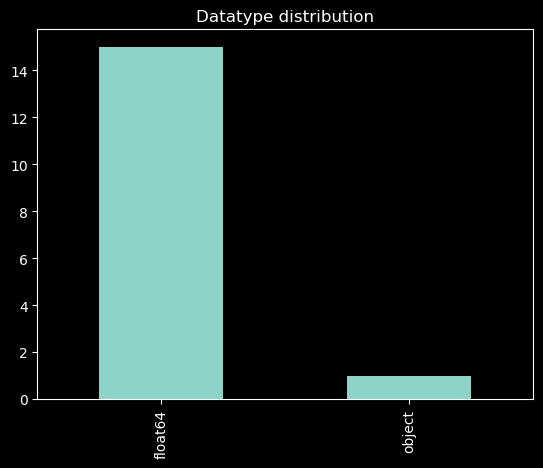

In [5]:
# Showing column types
df.dtypes.value_counts().plot.bar()
plt.title("Datatype distribution")
plt.show()

In [6]:
# Showing indicators
df.columns

Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate',
       'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
       'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'],
      dtype='object')

### 2.1. Top 5 inicial Indicators

It is unknown what indicators could affect the Gross Domestic Product (PBI). Nevertheless we are going to be focus on indicator that reflects the econocic and social state of the country:

* urbanrate: Urbanization reflects the growth and dynamics of an economy, as cities often serve as centers of economic activity, innovation, and development
* co2emissions: CO2 emissions are an important indicator of a country's ecological footprint and environmental sustainability, which is relevant for both the economy and the quality of life of the population.
* Internetuserate: Access to the Internet can influence productivity, participation in the digital economy, and access to information. It can also be related to economic and social development
* lifeexpectancy: Life expectancy is a key indicator of the health and well-being of the population, which can have implications for the workforce and the economic burden on healthcare and pensions systems.
* employmentrate: The employment rate is essential for the economic well-being of the population and a country's ability to maintain a healthy economy.

In [7]:
# Showing these top 5 indicators for a sample of 5 countries
top_indicators = [ "internetuserate", "urbanrate", "armedforcesrate", "lifeexpectancy", "employrate"]
color = {
    "incomeperperson": "#CDFAD5",
    "urbanrate": "#D2E0FB",
    "armedforcesrate": "#F9F3CC",
    "internetuserate": "#D7E5CA",
    "lifeexpectancy": "#8EACCD",
    "employrate": "#FF8080"
}
df[["country"] + top_indicators].sample(5)

,country,internetuserate,urbanrate,armedforcesrate,lifeexpectancy,employrate
161,Tunisia,36.562553,66.50,1.266624,74.515,41.599998
158,Bhutan,13.598876,34.48,NaN,67.185,58.400002
150,Indonesia,9.900039,51.46,0.515940,69.366,61.500000
108,Chad,1.700031,26.68,0.835812,49.553,68.900002
52,Vietnam,27.851822,27.84,1.085367,75.181,71.000000


## 3. Univariate Analysis

### 3.1 Income per Person Univariate analysis

In [8]:
# Income per Person Percentiles
df["incomeperperson"].describe(percentiles=[.25, .5, .75, .95, .99])

count      175.000000
mean      7553.392250
std      11074.571742
min        103.775857
25%        609.744287
50%       2425.471293
75%       8880.432039
95%      32954.632381
99%      43177.953717
max      52301.587180
Name: incomeperperson, dtype: float64

Text(0.5, 1.0, 'Top Countries with bigger GDP')

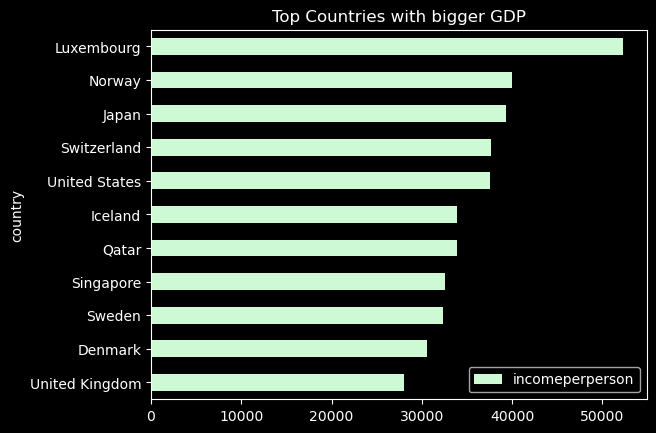

In [9]:
# Top Countries with biggest GDP
biggest_gdp_countries = df.drop_duplicates().sort_values(by="incomeperperson", ascending=False)[10::-1]
biggest_gdp_countries.plot.barh(x="country", y="incomeperperson", color=color["incomeperperson"])
plt.title("Top Countries with bigger GDP")

Text(0.5, 1.0, 'Countries with lower GDP')

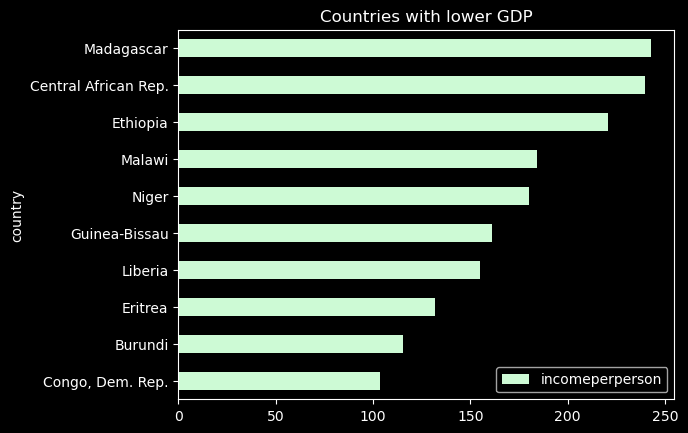

In [10]:
# Top Countries with lower GDP
lowest_gdp_countries = df.drop_duplicates().sort_values(by="incomeperperson").head(10)
lowest_gdp_countries.plot.barh(x="country", y="incomeperperson", color=color["incomeperperson"])
plt.title("Countries with lower GDP")

In order to check if the indicators we chose are the best, we are going to compare these 10 countries with the biggest GDPs and the ones with lowest GDPs. 

In [11]:
# Function that paints lines for each country according to one indicator
def paint_lines(indicator):
    for index, country in biggest_gdp_countries.iterrows():
        # Green for biggest gdp's countries
        plt.axvline(country[indicator], color='g', linestyle='dashed', linewidth=1) 
    for index, country in lowest_gdp_countries.iterrows():
        # Red for lowest gdp's countries
        plt.axvline(country[indicator], color='r', linestyle='dashed', linewidth=1)

<Axes: >

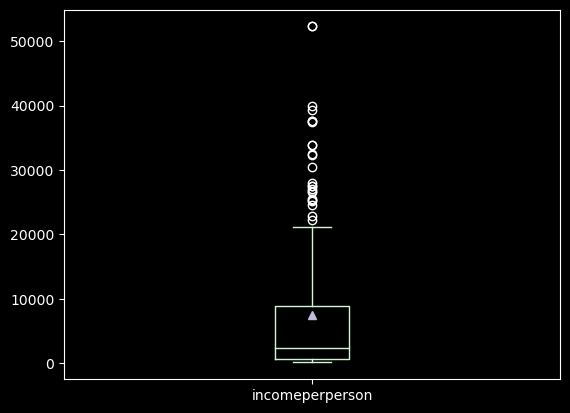

In [12]:
# Box Plot for Income per Person
df['incomeperperson'].plot.box(showmeans=True, color=color["incomeperperson"])

Most countries have GDP lower than 8880. And there in clearly a tendency to have lower GDPs, making outliers to have bigger GDPs

### 3.2 Urban rate analysis

In [13]:
# Urban rate Percentiles
df["urbanrate"].describe()

count    178.000000
mean      56.282135
std       22.561796
min       10.400000
25%       36.965000
50%       59.600000
75%       73.460000
max      100.000000
Name: urbanrate, dtype: float64

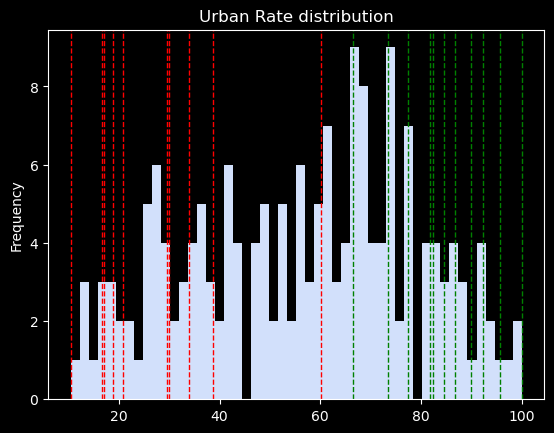

In [14]:
# Urban rate distribution
df["urbanrate"].plot.hist(bins=50, color=color["urbanrate"])
plt.title("Urban Rate distribution")
paint_lines("urbanrate")

Aparently, there is a relation between urban rate and GDP, top countries tend to be more urbanized.

### 3.3 Employment Rate Univariate Analysis

In [15]:
# Employ rate Percentiles
df['employrate'].describe()

count    177.000000
mean      58.854237
std       10.334804
min       34.900002
25%       51.400002
50%       58.799999
75%       65.000000
max       83.199997
Name: employrate, dtype: float64

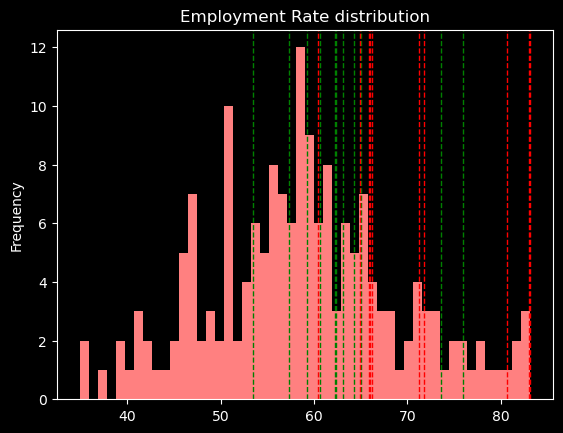

In [16]:
# Employ rate distribution
df["employrate"].plot.hist(bins=50, color=color["employrate"])
plt.title("Employment Rate distribution")
paint_lines("employrate")

No country has an employment rate bigger than 83%. It is also interesant to see that the best country in terms of employment rate is also one of the worst in terms of GDP.

### 3.4 Internet Use Rate Univariate analysis

In [17]:
# Internet use rate Percentiles
df['internetuserate'].describe()

count    174.000000
mean      34.740125
std       28.088371
min        0.210066
25%        9.924668
50%       29.939930
75%       55.973228
max       95.638113
Name: internetuserate, dtype: float64

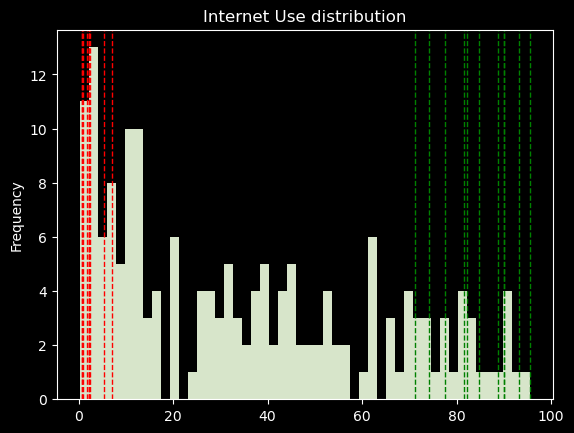

In [18]:
# Life expectancy distribution
df["internetuserate"].plot.hist(bins=50, color=color["internetuserate"])
plt.title("Internet Use distribution")
paint_lines("internetuserate")

In 2010 there was clearly a tendency for countries to not have access to internet. Apparently this impacting their GDPs.

### 3.5 Life Expectancy Univariate analysis

In [19]:
# Internet use rate Percentiles
df['lifeexpectancy'].describe()

count    178.000000
mean      69.414949
std        9.808335
min       47.794000
25%       62.725000
50%       72.974000
75%       76.127500
max       83.394000
Name: lifeexpectancy, dtype: float64

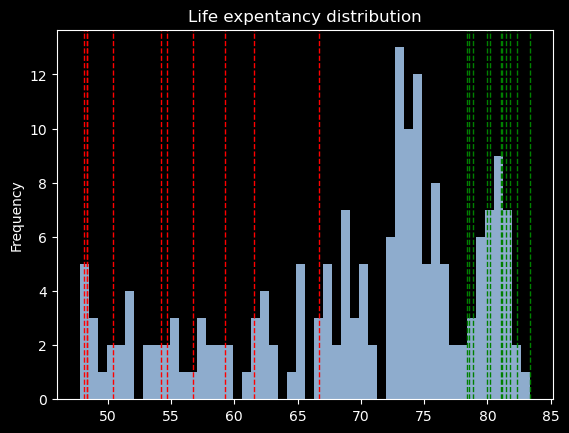

In [20]:
# Life expectancy distribution
df["lifeexpectancy"].plot.hist(bins=50, color=color["lifeexpectancy"])
plt.title("Life expentancy distribution")
paint_lines("lifeexpectancy")

On contrary to Interenet use rate, Countries tend to have higher life expentancy, this could be explained due to advancements in medicine and healt care. 

### 3.6 Armed Forces Univariate Analysis

In [21]:
# Internet use rate Percentiles
df['armedforcesrate'].describe()

count    174.000000
mean       1.376696
std        1.499729
min        0.000000
25%        0.491714
50%        0.931293
75%        1.601996
max        9.820127
Name: armedforcesrate, dtype: float64

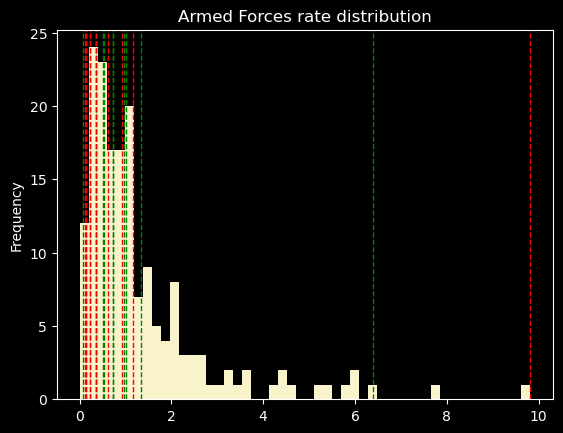

In [22]:
# Life expectancy distribution
df["armedforcesrate"].plot.hist(bins=50, color=color["armedforcesrate"])
plt.title("Armed Forces rate distribution")
paint_lines("armedforcesrate")

Most countries doesn't have more than 20% of their labor force working in military. This could be explained thanks to no recent major wars. 

# 4. Bi-variate Analysis

### 4.1 Collinearity

In order to develop a good lineal regression model we need to check if these 5 attributes doesn't have a correlation greater than 0.8.

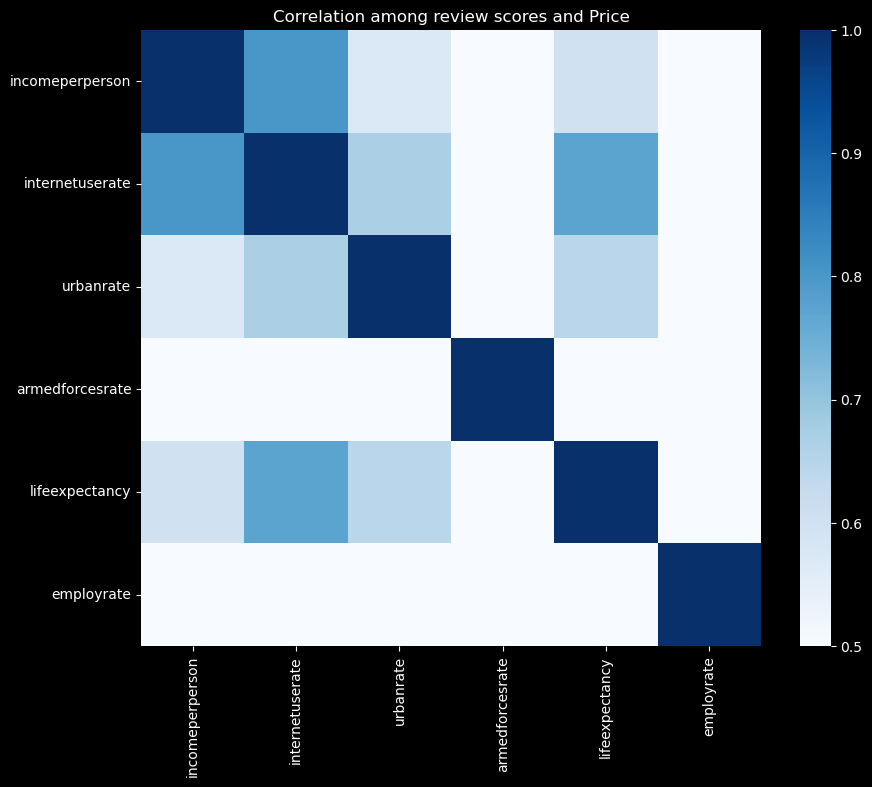

In [23]:
# Plotting correlation heatmap among indicators and gdp
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[["incomeperperson"] + top_indicators].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores and Price")
plt.show()

Indicators selected are not greatly correlated between each other. This means these indicators could be good features in a lineal regression model.

### 4.2 Lineality

There are some extreme outliers, we are going to remove them from the analysis.

In [24]:
# Filtering DF with no outliers
q1 = df["incomeperperson"].quantile(0.25)
q3 = df["incomeperperson"].quantile(0.75)
iqr = q3 - q1
outliers_max_factor = 1.5
df_no_outliers = df.loc[df["incomeperperson"] <= (q3 + outliers_max_factor * iqr)]

<Axes: title={'center': 'DF No Outliers'}, xlabel='incomeperperson', ylabel='internetuserate'>

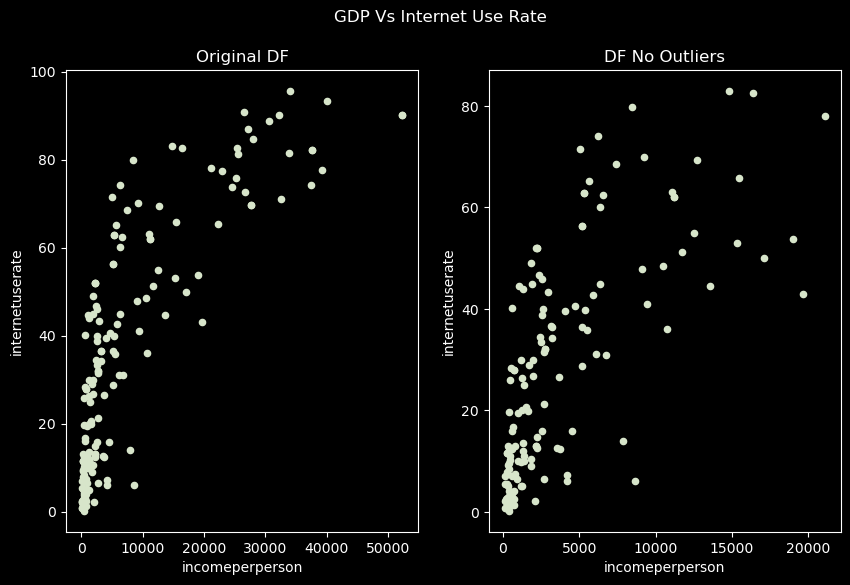

In [25]:
# GDP vs Internet use rate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.suptitle("GDP Vs Internet Use Rate")
df.plot.scatter(ax=axes[0], x='incomeperperson', y='internetuserate', color=color['internetuserate'])
axes[0].set_title("Original DF")
axes[1].set_title("DF No Outliers")
df_no_outliers.plot.scatter(ax=axes[1], x='incomeperperson', y='internetuserate', color=color['internetuserate'])

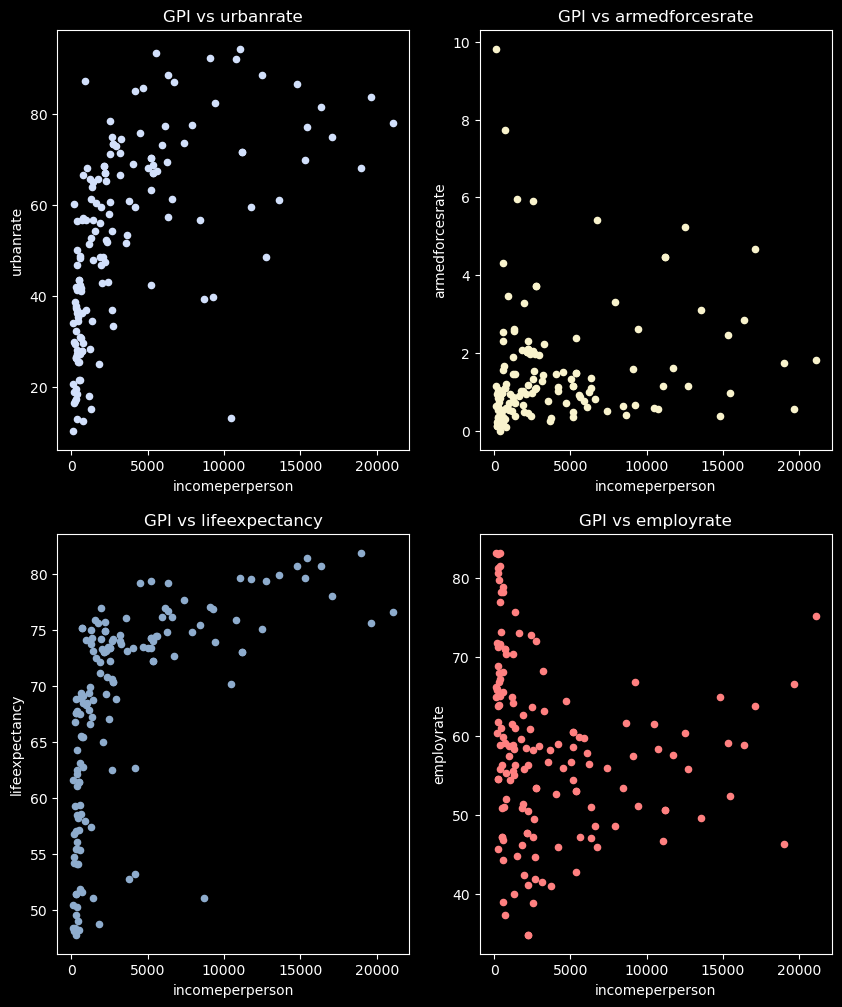

In [26]:
# GDP vs Oil Per person
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
index = 0
for i in range(0,2):
    for j in range(0,2):
        index += 1
        indicator = top_indicators[index]
        axes[i][j].set_title("GDP vs " + indicator)
        df_no_outliers.plot.scatter(ax=axes[i][j], x='incomeperperson', y=indicator, c=color[indicator])      

Armed forces rate doesn't have a lineal behaviour vs Income per person (GDP). We are going to remove it from our indicators and test other indicators.

In [27]:
top_indicators.remove("armedforcesrate")

### 4.3 Testing other indicators

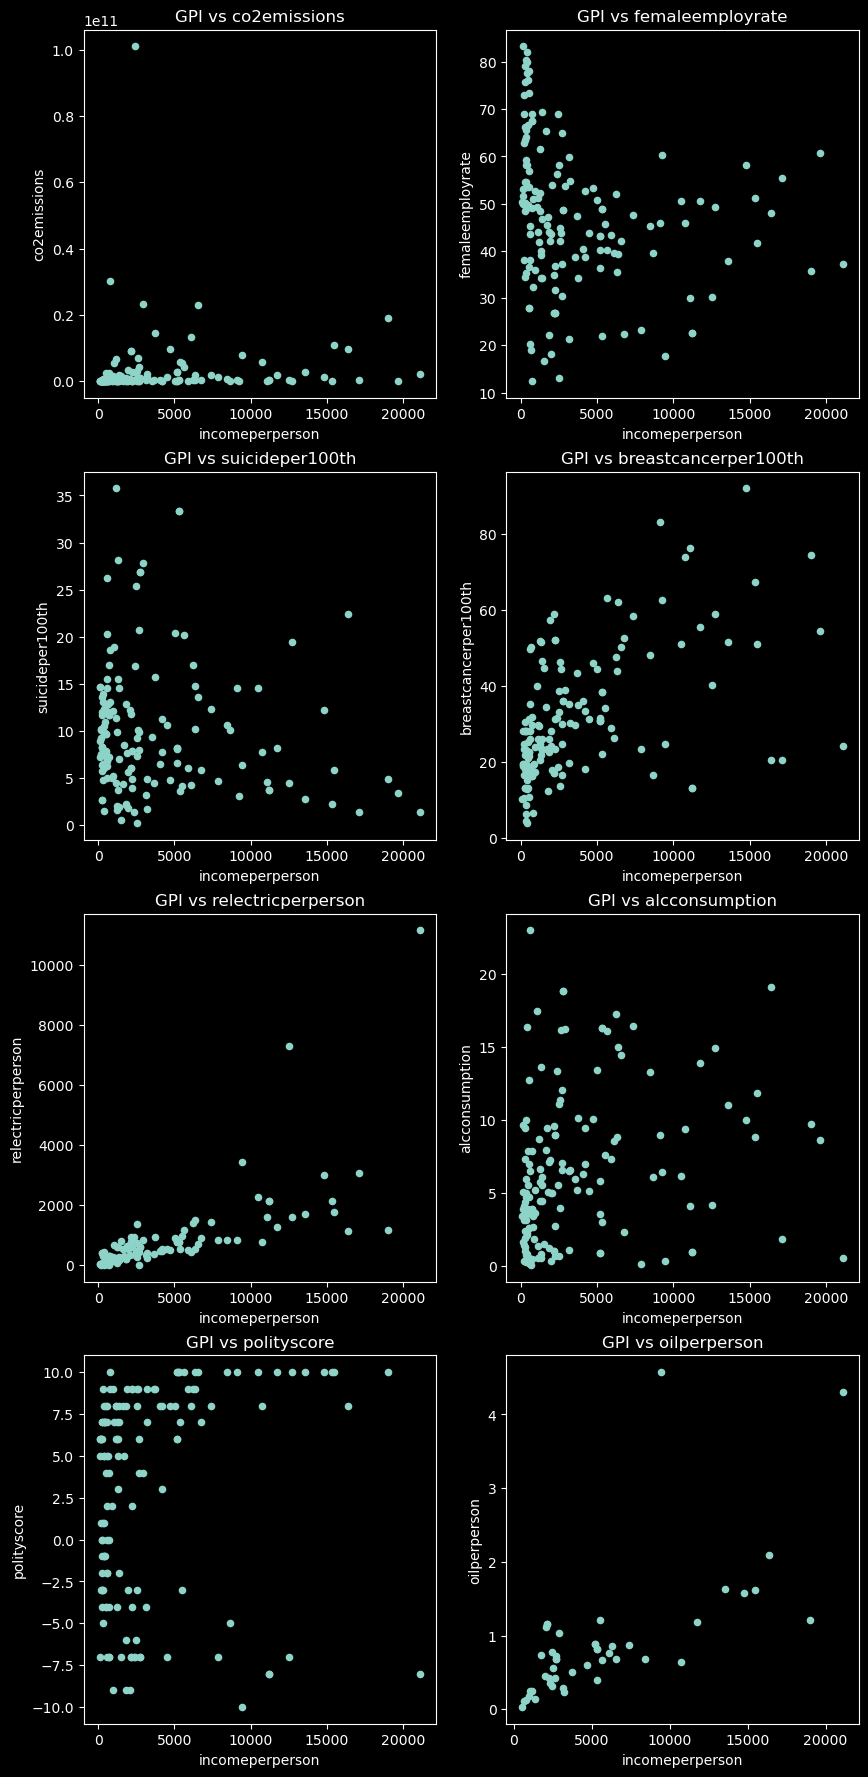

In [28]:
# GDP vs Several indicators
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,22))
other_indicators = ['oilperperson', 'polityscore', 'alcconsumption', 'relectricperperson', 'breastcancerper100th', 'suicideper100th', 'femaleemployrate', 'co2emissions']
for i in range(0,4):
    for j in range(0,2):
        indicator = other_indicators.pop()
        axes[i][j].set_title("GDP vs " + indicator)
        df_no_outliers.plot.scatter(ax=axes[i][j], x='incomeperperson', y=indicator)            


 Oil per person and Electricity Comsumption per person have a linear relation with Income per person (GDP). This could be because these indicators usually are related with more industrialization in the country. 

### 4.4 Indicators chosen based on Bi variate analysis

In [29]:
# Showing these top 5 indicators for a sample of 5 countries
top_indicators += ["oilperperson", "relectricperperson", "alcconsumption", "breastcancerper100th", "suicideper100th", "femaleemployrate"]
df[["country"] + top_indicators].sample(5)

,country,internetuserate,urbanrate,lifeexpectancy,employrate,oilperperson,relectricperperson,alcconsumption,breastcancerper100th,suicideper100th,femaleemployrate
143,Lithuania,62.811900,66.96,72.231,53.099998,0.812369,758.858719,16.30,38.5,33.341860,48.799999
16,Kenya,25.899797,21.60,57.134,73.199997,NaN,41.180003,3.88,25.2,10.937718,66.599998
138,Uruguay,47.867469,92.30,77.005,57.500000,NaN,823.823197,8.99,83.1,14.537270,46.000000
70,Ecuador,28.999477,65.58,75.632,59.700001,0.732817,314.826200,9.43,23.5,8.504684,45.500000
90,Botswana,5.999836,59.58,53.183,46.000000,NaN,454.795705,6.97,33.4,11.213970,38.700001


## 5. Data Preparation

### 5.1  Precision: Finding Duplicates

First, we are going to check if there are duplicates 

In [30]:
# Search for duplicates
df[df.duplicated()]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
32,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.4,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
39,Oman,11191.811010,0.92,4.465998,13.2,4.879930e+08,22.600000,0.1,61.987413,72.974,NaN,-8.0,2124.608816,3.716739,50.700001,71.62
74,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90
111,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.1,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
120,Malaysia,5184.709328,0.87,1.142127,30.8,2.670950e+09,43.099998,0.5,56.300034,74.221,0.890813,6.0,767.970324,8.211067,60.500000,70.36
124,Iran,2161.546510,1.03,2.026400,17.1,9.183548e+09,26.900000,0.2,13.000111,72.974,1.162576,-7.0,753.209802,6.021882,47.799999,68.46
143,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.1,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96
148,Belarus,2737.670379,18.85,3.711930,36.0,9.998743e+08,48.599998,0.3,32.052144,70.349,0.687828,-7.0,614.907287,26.874690,53.400002,73.46
149,Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.4,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
155,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34


In [31]:
# Removing duplicates
df = df.drop_duplicates()

In [32]:
df.shape

(166, 16)

### 5.2 Completiness: Missing Values

Incomeperperosn is going to be our objective variable so we are going to remove countries with this column in Null.

In [33]:
df[df["incomeperperson"].isnull()]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
68,Kuwait,NaN,0.10,1.609548,31.8,1.712755e+09,42.0,NaN,38.260234,74.576,6.467568,-7.0,8362.567977,1.498057,65.699997,98.36
100,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.6,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
134,Myanmar,NaN,0.58,1.912965,20.2,3.229600e+08,66.5,0.6,NaN,65.193,NaN,-6.0,38.005637,10.114997,74.699997,32.58


In [34]:
df = df.dropna(subset=["incomeperperson"])

In [35]:
df.shape

(163, 16)

Now, we are going to check if we have enough information about the indicators we chose.

In [36]:
# Checking missing values in indicators
print("Missing values in Indicators")
for indicator in top_indicators:
    missing_values = df[indicator].isnull().sum()
    print(indicator + ":", missing_values)

Missing values in Indicators
internetuserate: 2
urbanrate: 0
lifeexpectancy: 0
employrate: 1
oilperperson: 103
relectricperperson: 35
alcconsumption: 0
breastcancerper100th: 1
suicideper100th: 0
femaleemployrate: 1


Text(0.5, 1.0, 'Percentage of missing Values')

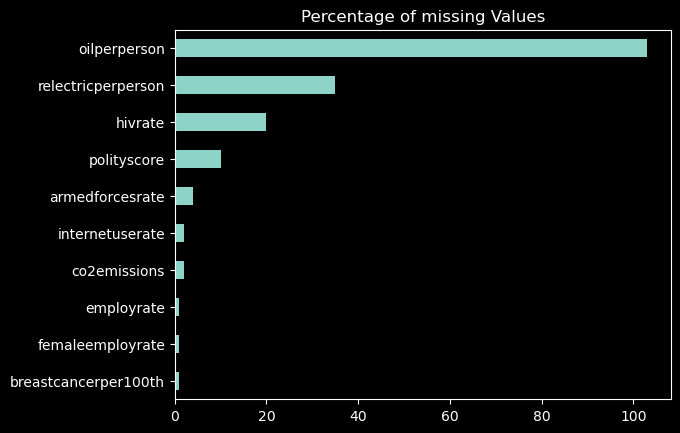

In [37]:
df.isna().sum()[df.isna().sum()>0].sort_values().plot.barh()
plt.title("Percentage of missing Values")

In [38]:
# Indicators with no missing information
df.isna().sum()[df.isna().sum()==0]

country            0
incomeperperson    0
alcconsumption     0
lifeexpectancy     0
suicideper100th    0
urbanrate          0
dtype: int64

Oil consumption and Electric consumption per person present a large amount of missing values. This could affect our linear regression model. We are going to remove them from our top indicators 

In [39]:
top_indicators.remove('oilperperson')
top_indicators.remove('relectricperperson')

Now, we are going to search which countries have missing values in the top indicators.

In [40]:
# Countries with missing values
top_indicators_missing_values=['internetuserate', 'employrate', 'breastcancerper100th', 'femaleemployrate']
missing_values_df = df.loc[
    df['internetuserate'].isna() | 
    df['employrate'].isna() | 
    df['breastcancerper100th'].isna() |
    df['femaleemployrate'].isna()][["country"] + top_indicators_missing_values]
missing_values_df

,country,internetuserate,employrate,breastcancerper100th,femaleemployrate
98,Sudan,NaN,47.299999,22.5,27.900000
123,Sierra Leone,NaN,63.799999,28.1,63.400002
127,Djibouti,6.497924,NaN,19.5,NaN
164,Timor-Leste,0.210066,67.300003,NaN,54.700001


Due to several reasons, these countries doesn't have all the data. There are countries from Africa, Asia and Oceania. We are not going to assume any value for these columns, so the best thing is to remove them from the dataset. 

In [41]:
# Removing missing values_df
df = df[~df['country'].isin(list(missing_values_df['country']))]


In [42]:
# Dimenssions
df.shape

(159, 16)

### 5.3 Relevance: Adding Additional Data

We are going to add data about the continent of each Country, to check if this interfeers with the GDP.

In [43]:
# Reading continents csv
continents_df = pd.read_csv("data/countries-continents.csv")

In [44]:
# Show a sample of continents df
continents_df.sample(5)

,continent,country
16,Africa,Eritrea
19,Africa,Gambia
186,South America,Colombia
138,Europe,Slovenia
106,Europe,Bulgaria


In [45]:
# Merging dataframes
df = pd.merge(df, continents_df, on='country')


In [47]:
# Merged DF
df[["country", "continent", "incomeperperson"]]

,country,continent,incomeperperson
0,Ireland,Europe,27595.091350
1,Albania,Europe,1914.996551
2,Barbados,North America,9243.587053
3,Italy,Europe,18982.269290
4,Switzerland,Europe,37662.751250
...,...,...,...
141,Latvia,Europe,5011.219456
142,Mexico,North America,6105.280743
143,Mauritius,Africa,5182.143721
144,Namibia,Africa,2667.246710


In [50]:
# Checking if there is an NaN in continent column
df["continent"].isna().sum()

0

Now that we have the continent information, we can check how this affects the Gross Domestic Product

Text(0.5, 1.0, 'Average GPI per Continent')

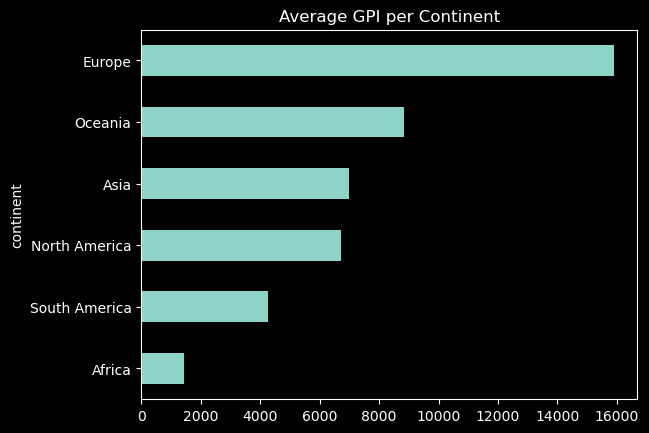

In [58]:
df.groupby("continent")['incomeperperson'].mean().sort_values().plot.barh()
plt.title("Average GDP per Continent")

### 5.4 Accordance: Checking Numeric Values

There are some indicators that represents a percentage. It is not possible that these columns have values greater than 100. Also lifeexpectancy should not be greater than this value.

In [68]:
print("Number of values greater than 100")
print("---------------------------------")
for indicator in top_indicators:
    count = len(df[df[indicator] > 100])
    print(indicator, count)

Number of values greater than 100
---------------------------------
internetuserate 0
urbanrate 0
lifeexpectancy 0
employrate 0
alcconsumption 0
breastcancerper100th 0
suicideper100th 0
femaleemployrate 0


There is no problem with this values. Finally we are going to check if these indicators have only positive values. Having negative values could mean problem in the data.

In [69]:
indicators_less_100 = ['internetuserate', 'urbanrate', 'lifeexpectancy', 'employrate', 'femaleemployrate']
print("Number of values negative")
print("---------------------------------")
for indicator in top_indicators:
    count = len(df[df[indicator] < 0])
    print(indicator, count)

Number of values negative
---------------------------------
internetuserate 0
urbanrate 0
lifeexpectancy 0
employrate 0
alcconsumption 0
breastcancerper100th 0
suicideper100th 0
femaleemployrate 0


## 6. Conclussions

In this dataset, we have encountered several data quality issues, such as:

1. **Relevance Issues:**
- There was not information about the continent of each country. To fix this we import them from another dataset.

2. **Completiness Issues:**
- Some indicators doesn't have data for much countries. We decided to not take them into account in the analysis.
- After choosing the best indicators, we notice that four countries didn't have enough of this data. We decided to remove them from the dataset.
 
4. **Temporal Issues:**
- We can observe that the information taken from Gapminder is not from the same year. And also it is not updated with 2023 values.


In [73]:
# Saving final Dataframe with fixes
df.to_csv("data/gapminder_final.csv", index=False)


In [74]:
top_indicators

['internetuserate',
 'urbanrate',
 'lifeexpectancy',
 'employrate',
 'alcconsumption',
 'breastcancerper100th',
 'suicideper100th',
 'femaleemployrate']